# LAB - WEEK 4, DAY2 

### 1) check if there are highly correlated features and drop them if there are any.


In [9]:
import pandas as pd 
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [10]:
#df = pd.read_csv("C:/Users/tomma/Documents/data_science/berlin/TommasoLaboratories/data/labs/Data_Marketing_Customer_Analysis_Round3.csv")
df = pd.read_csv("C:/Users/tomma/Documents/data_science/berlin/TommasoLaboratories/data/labs/Data_Marketing_Customer_Analysis_Round3.csv")
df = df.iloc[:,1:]
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,26794,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,64811,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [11]:
df.head(5)

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,26794,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


<AxesSubplot:>

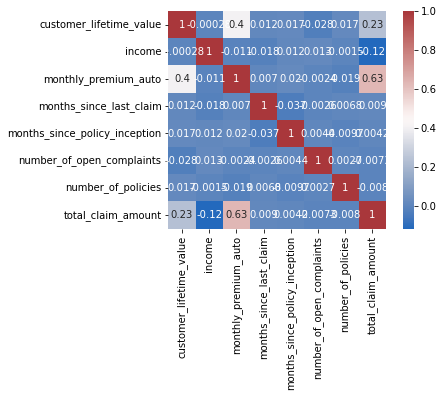

In [12]:
#fig = plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='vlag', square=True, annot=True)

## 2) One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. ( Hint: check Dropfirst option).


In [13]:
df = df.drop(['effective_to_date'],axis=1)
df.head(2)

,region,customer_lifetime_value,response,coverage,education,month,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,feb,employed,m,48029,suburban,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,jan,unemployed,f,26794,suburban,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize


In [14]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
df.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,26794,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0


## 3) Display outliers

In [15]:
## only numerical 
df_num = df.iloc[:,1:].select_dtypes(np.number)

Text(0.5, 1.0, 'hist')

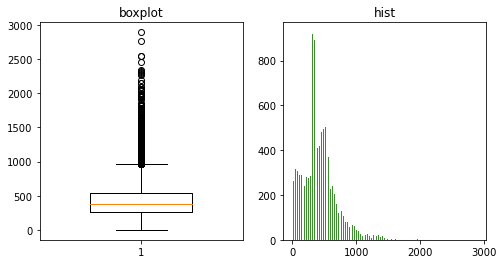

In [16]:
## visualize outliers 
fig, ax = plt.subplots(4,2, figsize = (8,4))
plt.subplot(1,2,1)
plt.boxplot(df_num['total_claim_amount'], widths=.5)
plt.title('boxplot')
plt.subplot(1,2,2)
plt.hist(df_num['total_claim_amount'], color = '#398f29', edgecolor = 'white', bins = 100)
plt.title('hist')

In [17]:
## define a function to find outliers
def removeOutliers(df, col, limit):
    p1 = limit
    p2 = 1-limit
    outliers = col.between(col.quantile(p1), col.quantile(p2))
    df = df.loc[outliers]
    return df

## define a function to find outliers
def removeHighOutliers(df, col, limit):
    p1 = 1-limit
    outliers = col.between(0, col.quantile(p1))
    df = df.loc[outliers]
    return df

In [18]:
## define a function to find outliers 
def findOutiliers(col):
    ''' Split the column in 3 categories: within 45% around the mean, 5% extremes 
    above and below''' 
    percentiles = col.describe([.05,.95])
    col = ['low_outliers' if x<percentiles['5%'] 
           else 'normal' if (x>=percentiles['5%'] and x<percentiles['95%'])
           else 'high_outliers' for x in col]
    return col

In [19]:
#df_num['outliers'] = findOutiliers(df_num['total_claim_amount'])
#df_num['outliers'].unique()

## subset the df to drop outliers 
#df_num = df_num.where((df_num['outliers']!="high_outliers") & (df_num['outliers']!="low_outliers"))
#df_num = df_num.dropna(subset=['outliers'])

### CHECK OUTLIERS

In [20]:
## reload the df
df = pd.read_csv("C:/Users/tomma/Documents/data_science/berlin/TommasoLaboratories/data/labs/Data_Marketing_Customer_Analysis_Round3.csv")
df_num = df.iloc[:,1:].select_dtypes(np.number)
df_cat = df.iloc[:,1:].select_dtypes(np.object)

C:\Users\tomma\AppData\Local\Temp\ipykernel_14544\3292730521.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cat = df.iloc[:,1:].select_dtypes(np.object)


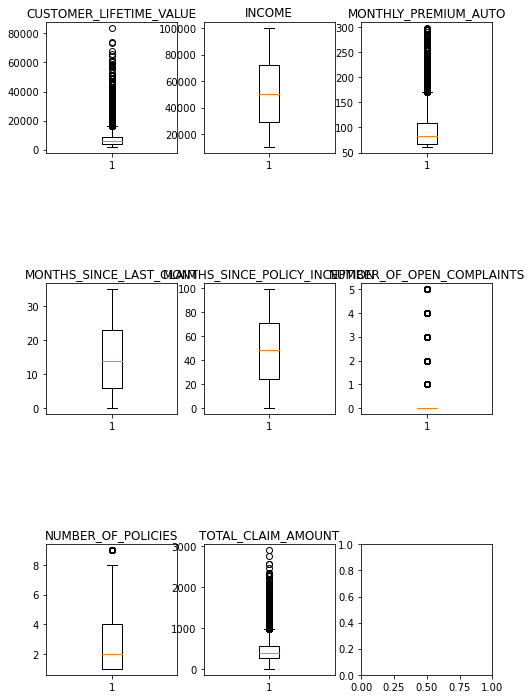

In [21]:
## check other vars 
fig, ax = plt.subplots(3,3, figsize = (8,12))

for i in range(1,9):
    plt.subplot(3,3,i)
    plt.boxplot(df_num.iloc[:,i-1])
    plt.title(f'{df_num.columns[i-1].upper()}')
fig.subplots_adjust(hspace=1)


### 3b) X-y split (y is the target variable which is the total claim amount)


In [22]:
#to_clean = df_num[["total_claim_amount", "customer_lifetime_value", "monthly_premium_auto"]]

In [23]:
print(len(df_num))
df_num_clean = removeHighOutliers(df_num, df_num["total_claim_amount"], 0.05)
print(len(df_num_clean))
df_num_clean = removeHighOutliers(df_num_clean, df_num["customer_lifetime_value"], 0.05)
print(len(df_num_clean))
df_num_clean = removeHighOutliers(df_num_clean, df_num["monthly_premium_auto"], 0.05)
print(len(df_num_clean))


10689
10154
9696
9495


## MODELING 

In [24]:
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.model_selection 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox

### Create general functions

In [25]:
### LINEAR REGRESSION 
def LinearRegression(x,y):
    ## split data in test and trian
    names = x.columns
    x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=.30,random_state=123)
    std_scaler = StandardScaler().fit(x_tr)
    
    ## scale the data
    x_tr_z = std_scaler.transform(x_tr)
    x_ts_z = std_scaler.transform(x_ts)
    x_tr_z = sm.add_constant(x_tr_z)
    
    ## apply the model and get results
    ols = sm.OLS(y_tr, x_tr_z).fit()
    results = ols.summary()
    return results


def GetY(x,y):
    ## split data in test and trian
    x_tr, x_ts, y_tr, y_ts= train_test_split(x, y, test_size=.30,random_state=123)
    std_scaler = StandardScaler().fit(x_tr)
    
    ## scale the data
    x_tr_z = std_scaler.transform(x_tr)
    x_ts_z = std_scaler.transform(x_ts)
    ols = sm.OLS(y_tr, x_tr_z).fit()
    y_pred = ols.predict(x_ts_z)
    return y_pred, y_ts

def PlotModels(y_pred,y_ts):
    ## plot x train and x train scaled 
    diff = y_pred - y_ts
    fig, ax = plt.subplots(1,3, figsize = (12,4))
    ax[0].set_title('Errors distrib.', fontsize=15)
    ax[0].hist(diff, bins = 100)
    ax[1].set_title('y test / y pred', fontsize=15)
    ax[1].scatter(y_pred, y_ts)
    ax[2].set_title('y test / y pred / mean', fontsize=15)
    ax[2].plot(y_pred,y_ts - y_pred, "o") 
    print(f"MEAN= {y_ts.mean()}")
    #plt.plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')
    ax[2].axhline(y=y_ts.mean(), color='r')


### GET RESULTS FROM LINEAR REGRESSION
def TableResults(result):
    ## get the results from LinearRegression and format them in a table
    table_results = pd.DataFrame(result.tables[1])
    list_col = ['ind_var', 'coef', 'std_err', 't_val', 'p_val', 'low_ci', 'high_ci']
    for num in range(0,len(table_results.columns)): 
        table_results.rename(columns={table_results.columns[num]: f"{list_col[num]}" }, inplace = True)
    table_results = table_results.iloc[1:,:]
    #table_results['obs'] = ols.nobs
    table_results.rename(columns={"P>|t|" : "p_val", "[0.025": "low_ci", "0.975]": "high_ci"}, inplace=True)
    table_results = table_results.set_index(table_results.columns[0])
    #table_results = table_results.astype(float)
    table_results = round(table_results, 3)
    table_results.index = names
    return table_results


### GET RESULTS 
def TableResults2(result):
    table_results = pd.DataFrame(result.tables[0].data)
    table_results = table_results.iloc[:,2:4].T
    table_results.columns = table_results.iloc[0]
    table_results = table_results.iloc[1:,]
    return table_results  


### GET R SQUARED
def GetR2(result):
    table_results = pd.DataFrame(result.tables[0].data)
    table_results = table_results.iloc[:,2:4].T
    table_results.columns = table_results.iloc[0]
    table_results = table_results.iloc[1,0:1]
    return table_results  


### GET ONLY COEFFICIENTS
def GetCoeff(result):
    ## get the results from LinearRegression and format them in a table
    table_results = pd.DataFrame(result.tables[1])
    list_col = ['ind_var', 'coef', 'std_err', 't_val', 'p_val', 'low_ci', 'high_ci']
    for num in range(0,len(table_results.columns)): 
        table_results.rename(columns={table_results.columns[num]: f"{list_col[num]}" }, inplace = True)
    table_results = table_results.iloc[1:,:]
    #table_results['obs'] = ols.nobs
    table_results.rename(columns={"P>|t|" : "p_val", "[0.025": "low_ci", "0.975]": "high_ci"}, inplace=True)
    table_results = table_results.set_index(table_results.columns[0])
    #table_results = table_results.astype(float)
    table_results = round(table_results, 3)
    table_results = table_results.iloc[1:, 0:2]
    return table_results

In [26]:
print(len(df_num))
print(len(df_num_clean))

10689
9495


### A) DIRTY DATASET

In [27]:
x = df_num.drop('total_claim_amount', axis=1)
y = df_num.total_claim_amount

print(len(x))
res1 = LinearRegression(x,y)
coeff1 = GetCoeff(res1)
coeff1.index = x.columns
coeff1 = pd.DataFrame(coeff1).applymap(str).applymap(float)
coeff1['coef'] = abs(coeff1['coef'])
coeff1.sort_values(by=['coef'],ascending=False, inplace=True)

r2_1 = GetR2(res1)
mse1 = ((y_ts - y_pred)*(y_ts - y_pred)/len(y_ts))
mse1 = ((((y_ts - y_pred)*(y_ts - y_pred)).sum())/len(y_ts))
rmse1 = math.sqrt(mse1)

y_pred, y_ts = GetY(x,y)
PlotModels(y_pred, y_ts)

10689


NameError: name 'y_ts' is not defined

### B) CLEANED DATASET

In [28]:
x = df_num_clean.drop('total_claim_amount', axis=1)
y = df_num_clean.total_claim_amount
print(len(x))

res2 = LinearRegression(x,y)
coeff2 = GetCoeff(res2)
coeff2.index = x.columns
coeff2 = pd.DataFrame(coeff2).applymap(str).applymap(float)
coeff2['coef'] = abs(coeff2['coef'])
coeff2.sort_values(by=['coef'],ascending=False, inplace=True)

r2_2 = GetR2(res2)
mse2 = ((y_ts - y_pred)*(y_ts - y_pred)/len(y_ts))
mse2 = ((((y_ts - y_pred)*(y_ts - y_pred)).sum())/len(y_ts))
rmse2 = math.sqrt(mse2)

print(r2_2, mse2)

y_pred, y_ts = GetY(x,y)
PlotModels(y_pred, y_ts)

9495


NameError: name 'y_ts' is not defined

In [ ]:
print(mse1, mse2)

### C) ADD CAT. VARS

In [ ]:
from sklearn import preprocessing
lab_encoder = preprocessing.LabelEncoder()
df_cat.columns
encode = lambda x: lab_encoder.fit_transform(x)
df_cat = df_cat.apply(encode)
df_cat.head(3)

df_all = df_num_clean.merge(df_cat, left_index=True, right_index=True)

In [ ]:
x = df_all.drop('total_claim_amount', axis=1)
y = df_all.total_claim_amount

res3 = LinearRegression(x,y)
coeff3 = GetCoeff(res3)
coeff3.index = x.columns
coeff3 = pd.DataFrame(coeff3).applymap(str).applymap(float)
coeff3['coef'] = abs(coeff3['coef'])
coeff3.sort_values(by=['coef'],ascending=False, inplace=True)

r2_3 = GetR2(res3)
mse3 = ((((y_ts - y_pred)*(y_ts - y_pred)).sum())/len(y_ts))
rmse3 = math.sqrt(mse3)

y_pred, y_ts = GetY(x,y)
PlotModels(y_pred, y_ts)

In [ ]:
fig, ax2 = plt.subplots(3, figsize = (4,12))
fig.suptitle("COEFFICIENTS", fontsize=16)
ax2[0].set_title('With outliers', fontsize=15)
ax2[0].barh(coeff1.index, coeff1['coef'], align='center')
ax2[1].set_title('Without outliers', fontsize=15)
ax2[1].barh(coeff2.index, coeff2['coef'], align='center')
ax2[2].set_title('Cat. vars', fontsize=15)
ax2[2].barh(coeff3.index, coeff3['coef'], align='center')

In [ ]:
from pandas import DataFrame
r_list = [r2_1, r2_2, r2_3]
r_df = DataFrame(r_list)
#r_df = r_df.T
r_df.reset_index(inplace=True, drop=True)
r_df.index = ['Model 1', 'Model 2', 'Model 3']
r_df.columns = ['r2']
r_df.iloc[:,0] = r_df.iloc[:,0].astype(float)

mse_list = [mse1, mse2, mse3]
mse_df = DataFrame(mse_list)
mse_df.reset_index(inplace=True, drop=True)
mse_df.index = ['Model 1', 'Model 2', 'Model 3']
mse_df.columns = ['mse']
mse_df.iloc[:,0] = mse_df.iloc[:,0].astype(float)
mse_df

In [ ]:
## PLOT R2
fig, ax2 = plt.subplots(1,2, figsize = (12,4))
fig.suptitle("COEFFICIENTS", fontsize=16)
ax2[0].set_title('R 2', fontsize=15)
ax2[0].bar(r_df.index, r_df['r2'])
ax2[1].set_title('MSE', fontsize=15)
ax2[1].bar(mse_df.index, mse_df['mse'])
#ax2[2].set_title('Cat. vars', fontsize=15)
#ax2[2].barh(coeff3.index, coeff3['coef'], align='center')



### 2) Standardize the data (after the data split).

In [ ]:
std_scaler = StandardScaler().fit(x_tr)

In [ ]:
##. finding the parameters ( mean, variance from the training set )
x_tr_z = std_scaler.transform(x_tr)
x_ts_z = std_scaler.transform(x_ts)
#print(x_train_scaled, x_test_scaled)

In [ ]:
## plot x train and x train scaled 
fig, ax = plt.subplots(1,2, figsize = (8,4))
plt.subplot(1,2,1)
plt.hist(x_tr.iloc[:,0], bins = 100)
plt.title('x_train')
plt.subplot(1,2,2)
plt.hist(x_tr_z[:,0], bins = 100)
plt.title('x_train scaled')

In [ ]:
## plot test and training
print(type(x_ts))
print(type(y_ts))


In [ ]:
## fit the model -- TRAINING SET
x_tr_z = sm.add_constant(x_tr_z)
ols = sm.OLS(y_tr, x_tr_z).fit()

## print the results
results = ols.summary()
print(results)

In [ ]:
## predicted values of the test set using the model made on the training set 
x_ts_z = sm.add_constant(x_ts_z)
y_pred = ols.predict(x_ts_z)
y_pred

In [ ]:
## fit the model -- TEST SET
diff = y_pred - y_ts

## plot x train and x train scaled 
fig, ax = plt.subplots(1,4, figsize = (8,4))
plt.subplot(1,2,1)
plt.hist(diff, bins = 100)
plt.title('HISTOGRAM: y pred - y test')
plt.subplot(1,2,2)
plt.scatter(y_pred, y_ts)

In [ ]:
fig, ax = plt.subplots(1, figsize = (8,4))
plt.plot(y_pred,y_ts - y_pred, "o")
plt.plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')
ax.axhline(y=y_pred.mean(), xmin=0.0, xmax=1.0, color='r')


In [ ]:
## fit the model -- TEST SET
diff = y_pred - y_ts

fig, ax2 = plt.subplots(1,3, figsize = (12,4))
fig.suptitle("COEFFICIENTS", fontsize=16)
ax2[0].set_title('With outliers', fontsize=15)
ax2[0].hist(diff, bins = 100)
ax2[1].set_title('Without outliers', fontsize=15)
ax2[1].scatter(y_pred, y_ts)
ax2[2].set_title('Cat. vars', fontsize=15)
ax2[2].plot(y_pred,y_ts - y_pred, "o")
plt.plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')
'''
## plot x train and x train scaled 
fig, ax = plt.subplots(1,3, figsize = (8,4))
plt.subplot(1,2,1)
plt.hist(diff, bins = 100)
plt.title('HISTOGRAM: y pred - y test')
plt.subplot(1,2,2)
plt.scatter(y_pred, y_ts)
plt.subplot(1,2,3)
plt.plot(y_pred,y_ts - y_pred, "o")
'''

In [ ]:
def tableResults(ols_summary):
    table_results = pd.DataFrame(ols.summary().tables[1].data)
    table_results.columns = table_results.iloc[0]
    table_results = table_results.iloc[1:,]
    table_results.iloc[0,0]
    table_results['obs'] = ols.nobs
    table_results.rename(columns={"P>|t|" : "p_val", "[0.025": "low_ci", "0.975]": "high_ci"}, inplace=True)
    table_results = table_results.set_index(table_results.columns[0])
    table_results = table_results.astype(float)
    table_results['errors'] = table_results['coef'] - table_results['low_ci']
    table_results = round(table_results, 3)
    return table_results

In [ ]:
table = tableResults(ols.summary())
table

In [ ]:
def tableResults2(ols_summary):
    table_results = pd.DataFrame(ols.summary().tables[0].data)
    table_results = table_results.iloc[:,2:4].T
    table_results.columns = table_results.iloc[0]
    table_results = table_results.iloc[1:,]
    return table_results  

In [ ]:
table2 = tableResults2(ols.summary())
table2.reset_index(inplace=True, drop=True)
table2